# Convolutional Neural Networks: Street View Housing Number Digit Recognition**



--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

To build a CNN model that can identify the digits in the images.

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [3]:
print(tf.__version__)

2.6.0


## **Loading the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Let us also split the data into train and the test dataset

In [4]:
import h5py

# Opening the file as read only

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Closing this file
h5f.close()

Let's check the number of images in the training and testing data.

In [5]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**


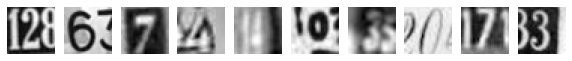

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # writing the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data Preparation**


In [8]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [9]:
# Reshaping the dataset to flatten them. 

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [10]:
# Normalizing inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [12]:
#Writing the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## **Model Building**

Now, we have done data preprocessing, let's build a CNN model.

In [13]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- We will write a function to return a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Uses **'same' padding** and provides an **apt input shape**
 - **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flattening** the output from the previous layer
 - Adding a **dense layer with 32 nodes**
 - Adding a **LeakyRelu layer with slope equal to 0.1**
 - Adding the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compiling the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. 
- We then call the function and store the model in a new variable
- We then print the summary of the model.
- Finally we fit the model on the train data with a **validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs**. Then we store the model building history to use later for visualization.

In [19]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential() 
    #Adding layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding = 'same', input_shape = (32,32,1)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(filters=32,kernel_size=(3,3), padding = 'same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(10, activation='softmax'))
    #declaring adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate = 0.001)
    
    #compiling the model
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [20]:
#Building the model
model_1 = cnn_model_1()

In [21]:
#Printing the model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [22]:
# Fitting the model
history_model_1 = model_1.fit(X_train, y_train, validation_split = 0.2, verbose = 1, batch_size = 32, epochs = 20)

Epoch 1/20
1050/1050 [==============================] - 42s 10ms/step - loss: 1.2018 - accuracy: 0.6021 - val_loss: 0.6985 - val_accuracy: 0.7949
Epoch 2/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.5672 - accuracy: 0.8379 - val_loss: 0.5376 - val_accuracy: 0.8517
Epoch 3/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.4717 - accuracy: 0.8644 - val_loss: 0.5149 - val_accuracy: 0.8535
Epoch 4/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.4102 - accuracy: 0.8814 - val_loss: 0.4581 - val_accuracy: 0.8756
Epoch 5/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3607 - accuracy: 0.8921 - val_loss: 0.4962 - val_accuracy: 0.8649
Epoch 6/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.3209 - accuracy: 0.9042 - val_loss: 0.4894 - val_accuracy: 0.8631
Epoch 7/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.2891 - accuracy: 0.9131 - val_loss: 0.4617 - va

### **Plotting the validation and training accuracies**

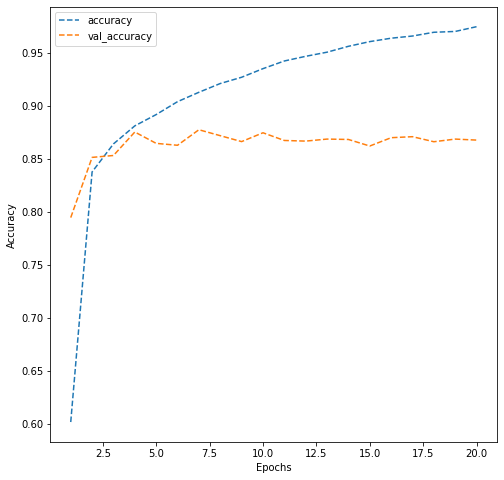

In [23]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**

* We can see that the performance of the model on the training data initially starts poorly but rapidly improves and continues improving its accuracy and reaching 97% accuracy

* However, the performance of the validation set never reaches the same heights and hovers around 86% through most of the epocs after an initial rise in performance. 

* This indicates that our model is overfitting on the training set and can't be generalized well over unseen data. 

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [24]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [25]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- We now write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Uses the **'same' padding** and provides an **apt input shape**
 - Adding a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Adding **LeakyRelu** with the **slope equal to 0.1**
 - Adding a **max-pooling layer** with a **pool size of 2x2**
 - Adding a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Adding a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Adding a **LeakyRelu layer with slope equal to 0.1**
 - Adding a **max-pooling layer** with a **pool size of 2x2**
 - Adding a **BatchNormalization layer**
 - **Flattening** the output from the previous layer
 - Adding a **dense layer with 32 nodes**
 - Adding a **LeakyRelu layer with slope equal to 0.1**
 - Adding a **dropout layer with rate equal to 0.5**
 - Addding the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compiling the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Calling the function and store the model in a new variable
- Printing the summary of the model.
- Fitting the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Then, storing the model building history to use later for visualization.

In [26]:
#Defineing the function
def cnn_model_2():
    model = Sequential() 
    #Adding layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', input_shape = (32,32,1)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))

    #declaring adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate = 0.001)
    
    #compiling the model
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [27]:
# Building the model
model_2 = cnn_model_2()

In [28]:
#Printing the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

In [29]:
# Fitting the model
history_model_2 = model_2.fit(X_train, y_train, validation_split = 0.2, epochs = 30, batch_size = 128, verbose = 1)

Epoch 1/30
263/263 [==============================] - 7s 23ms/step - loss: 1.4663 - accuracy: 0.5002 - val_loss: 3.2814 - val_accuracy: 0.1620
Epoch 2/30
263/263 [==============================] - 5s 21ms/step - loss: 0.6921 - accuracy: 0.7857 - val_loss: 0.6404 - val_accuracy: 0.8108
Epoch 3/30
263/263 [==============================] - 5s 21ms/step - loss: 0.5650 - accuracy: 0.8268 - val_loss: 0.4486 - val_accuracy: 0.8701
Epoch 4/30
263/263 [==============================] - 5s 21ms/step - loss: 0.5029 - accuracy: 0.8465 - val_loss: 0.4662 - val_accuracy: 0.8626
Epoch 5/30
263/263 [==============================] - 5s 21ms/step - loss: 0.4485 - accuracy: 0.8632 - val_loss: 0.4162 - val_accuracy: 0.8799
Epoch 6/30
263/263 [==============================] - 5s 21ms/step - loss: 0.4133 - accuracy: 0.8726 - val_loss: 0.4478 - val_accuracy: 0.8743
Epoch 7/30
263/263 [==============================] - 6s 21ms/step - loss: 0.3809 - accuracy: 0.8831 - val_loss: 0.4180 - val_accuracy: 0.8812

### **Plotting the validation and training accuracies**

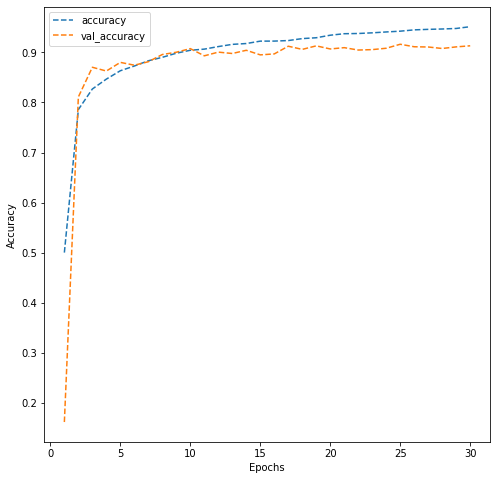

In [30]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**

* Our second model sees considerable improvement over the previous model. Despite performing slightly worse on the training data, the model performed much better on the validation data which is much more important. 

* The performance on the validation data now closely follows that of the training data which means that we no longer have the significant overfitting issue of the previous model and our new model is much more generalizable. 

* The performance on the validation reaches the score of 91% which is very good. 

## **Predictions on the test data**


In [31]:
#Making prediction on the test data using model_2 
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [32]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1814
           1       0.89      0.93      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.90      0.89      0.89      1719
           4       0.93      0.93      0.93      1812
           5       0.91      0.91      0.91      1768
           6       0.92      0.89      0.90      1832
           7       0.95      0.92      0.94      1808
           8       0.90      0.90      0.90      1812
           9       0.91      0.90      0.91      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



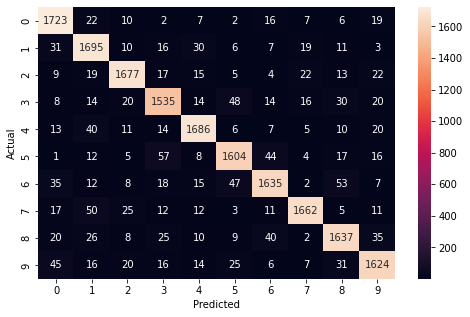

In [33]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:**

* Our model shows an f1 score higher than 90% for all but one of the digits which an indication of a very strong model. 

* Our model was in particular very good at predicting the digit 7, reaching an f1 score of 94%. 

* Our CNN model performed much better than our ANN model, so CNN is our best option for this classification problem. 

* The fact that our model performed very well on the test set means that it is generalizable and fit to be used on new data. 